In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [4]:
%matplotlib inline
sns.set(style="darkgrid")

In [8]:
def read_csv(file_name: str, path = "D:/Repositorio/Proyecto-titanic/Data") -> pd.DataFrame:
    return pd.read_csv(os.path.join(path, file_name))

In [10]:
data = read_csv("titanic.csv")

In [13]:
print(data.shape)
data.head(4)

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [15]:
data.describe(include="all")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


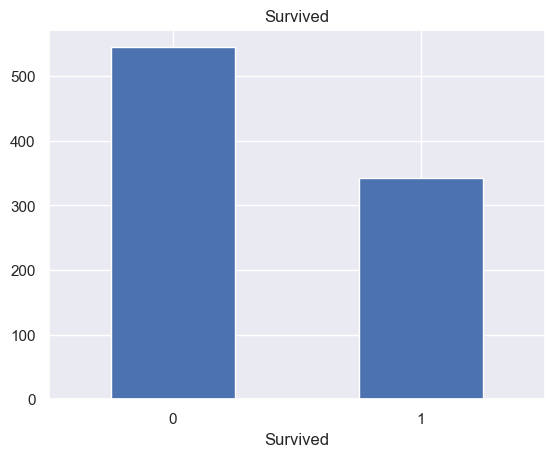

In [16]:
data.Survived.value_counts().plot(kind="bar")
plt.title("Survived")
plt.xticks(rotation=360)
plt.show()

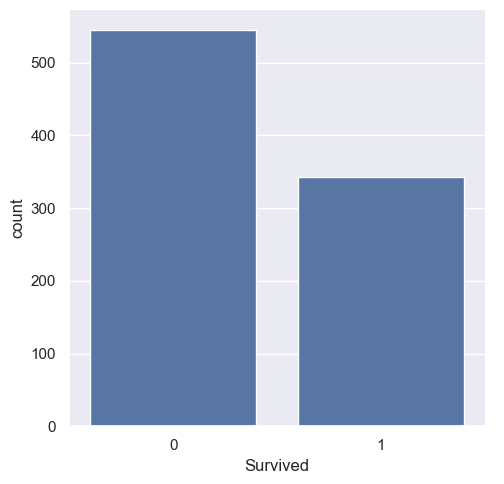

In [36]:
sns.catplot(data=data, x = "Survived",kind="count")
plt.show()

In [29]:
print(data.Survived.value_counts())
print(data.Survived.value_counts()/len(data))
print(data.Survived.value_counts(normalize=True))

Survived
0    545
1    342
Name: count, dtype: int64
Survived
0    0.614431
1    0.385569
Name: count, dtype: float64
Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64


In [23]:
data_numeric = data.select_dtypes(include=["int64", "float64"])
(
    data_numeric
    .quantile(q=[0.25, 0.5, 0.75])
    .transpose()
    .rename_axis("variable")
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.25,0.5,0.75,iqr
0,Survived,0.000,0.0000,1.0000,1.0000
1,Pclass,2.000,3.0000,3.0000,1.0000
2,Age,20.250,28.0000,38.0000,17.7500
3,Siblings/Spouses Aboard,0.000,0.0000,1.0000,1.0000
4,Parents/Children Aboard,0.000,0.0000,0.0000,0.0000
5,Fare,7.925,14.4542,31.1375,23.2125


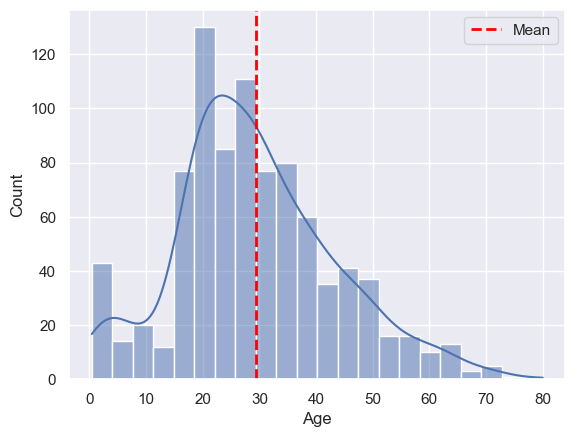

In [33]:
sns.histplot(data=data, x = "Age",kde=True)
plt.axvline(x = data.Age.mean(),
            color = "red",
            label = "Mean",
            linestyle = "--",
            linewidth = 2)
plt.legend()
plt.show()

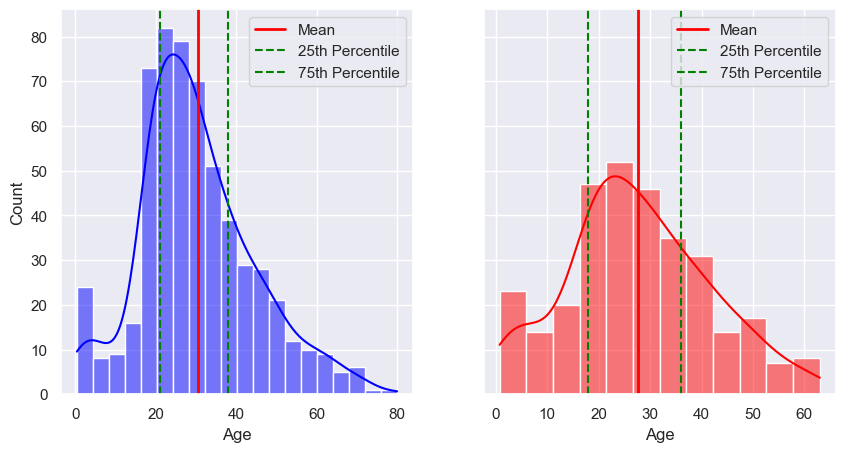

In [49]:
Sex = data.Sex.unique()
male_df = data.query("Sex == 'male'")
female_df = data.query("Sex == 'female'")

dfs = [male_df, female_df]
sex_color = {"male": "blue", "female": "red"}
fig, ax = plt.subplots(1, len(dfs), figsize=(10, 5),sharey=True)
for i in range(len(dfs)):
    sns.histplot(ax = ax[i],
                 data = dfs[i],
                 x = "Age",
                 hue="Sex",
                 kde = True,
                 palette=sex_color)
    ax[i].axvline(x = dfs[i].Age.mean(),
                  color = "red",
                  label = "Mean",
                 
                  linewidth = 2)
    ax[i].axvline(x=dfs[i].Age.quantile(0.25),
                  color="green",
                  label="25th Percentile",
                  linestyle="--")
    ax[i].axvline(x=dfs[i].Age.quantile(0.75),
                  color= "green",
                  label="75th Percentile",
                  linestyle="--")
    ax[i].legend()
 
plt.show()

In [50]:
data_numeric.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


<Axes: >

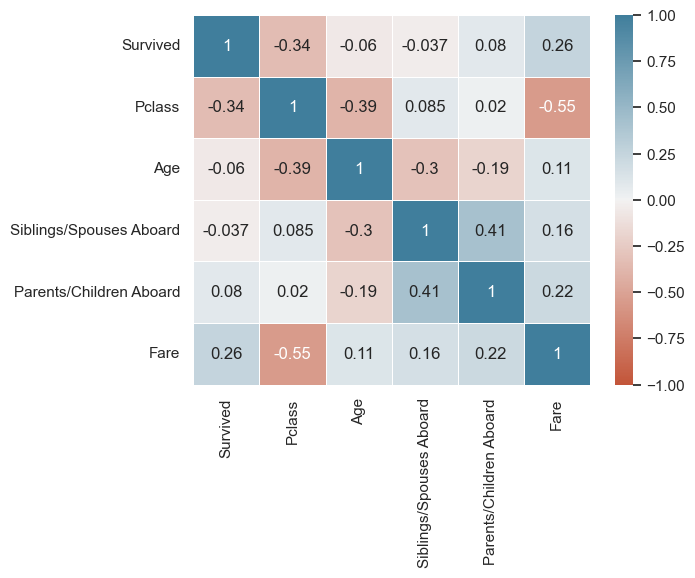

In [53]:
sns.heatmap(data_numeric.corr(),
            cmap=sns.diverging_palette(20, 230, as_cmap=True),
            vmin=-1,
            vmax=1,
            center=0,
            linewidths=.5,
            annot=True)

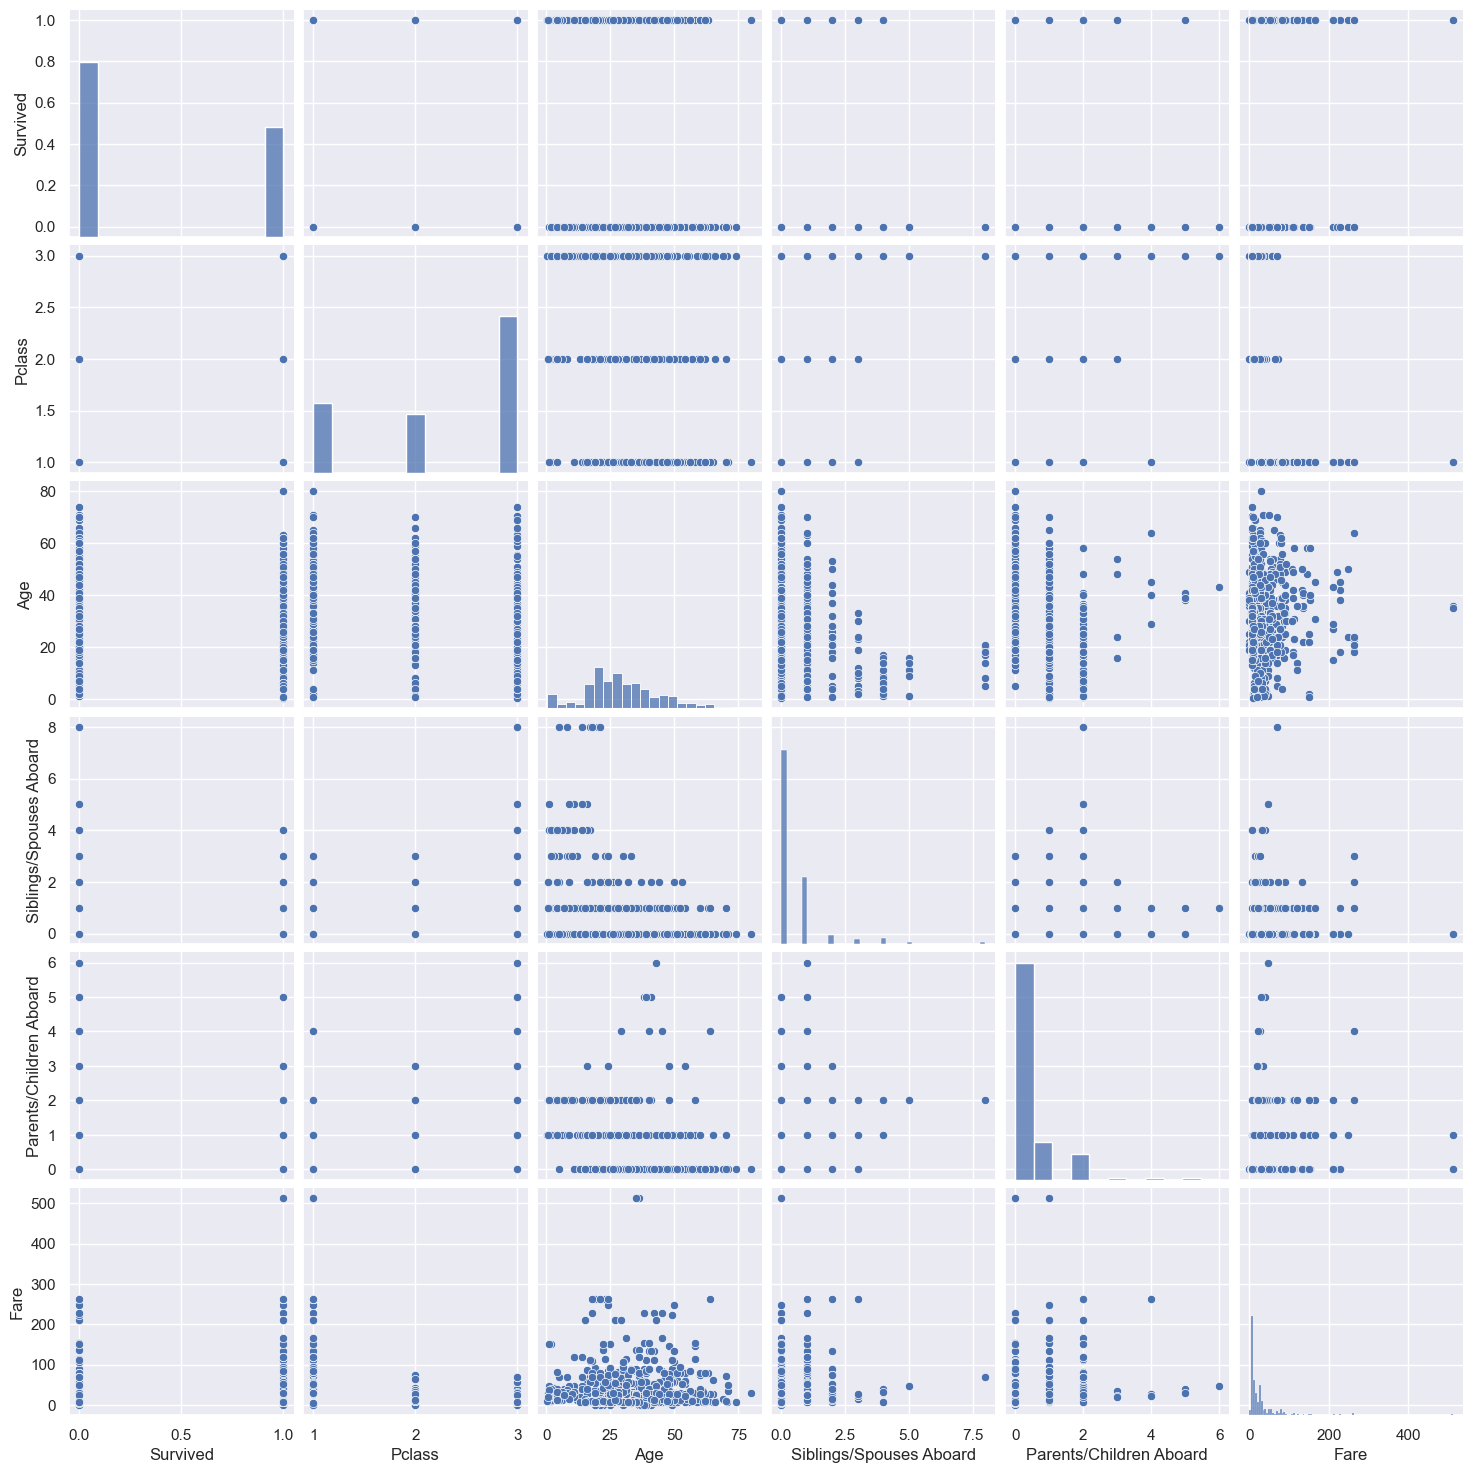

In [54]:
sns.pairplot(data=data)